***For better visualization of dataframes in jupyter notebooks***

In [1]:
from IPython.display import display, HTML
display(HTML('<style>pre { white-space: pre !important; }</style>'))

# Warm-up!

## Utility Functions

In [2]:
def show_data(df, num_rows=10):
    """
    Displays the number of rows and the first few rows of a DataFrame.

    Args:
        df (pyspark.sql.DataFrame): The DataFrame to display.
        num_rows (int, optional): The number of rows to display. Defaults to 10.
    """
    print(f"Number of rows: {df.count()}")
    print("First few rows:")
    df.show(num_rows)

## Part 1

In [3]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType, DateType
from pyspark.sql.functions import col, year, month, min, max, mean, stddev
from pyspark.sql.window import Window
from pyspark.sql import SparkSession

def read_stocks_data(spark, file_path):
    """
    Reads the stocks dataset from a CSV file into a PySpark DataFrame.

    Args:
        spark (SparkSession): The SparkSession object.
        file_path (str): The path to the CSV file.

    Returns:
        pyspark.sql.DataFrame: The DataFrame containing the stocks data.
    """
    schema = StructType([
        StructField("date", DateType(), True),
        StructField("open", FloatType(), True),
        StructField("high", FloatType(), True),
        StructField("low", FloatType(), True),
        StructField("close", FloatType(), True),
        StructField("volume", IntegerType(), True),
    ])

    return spark.read.csv(file_path, header=True, schema=schema)

In [4]:
# Create a SparkSession
spark = SparkSession.builder.appName("StocksAnalysis").getOrCreate()

# Read the stocks data
stocks_df = read_stocks_data(spark, r"data\stocks.csv")

# Show the data
show_data(stocks_df)

Number of rows: 1762
First few rows:
+----------+---------+---------+---------+---------+---------+
|      date|     open|     high|      low|    close|   volume|
+----------+---------+---------+---------+---------+---------+
|2010-01-04|   213.43|    214.5|   212.38|   214.01|123432400|
|2010-01-05|214.59999|   215.59|   213.25|214.37999|150476200|
|2010-01-06|214.37999|   215.23|   210.75|   210.97|138040000|
|2010-01-07|   211.75|    212.0|   209.05|   210.58|119282800|
|2010-01-08|210.29999|    212.0|   209.06|211.98001|111902700|
|2010-01-11|    212.8|    213.0|208.45001|   210.11|115557400|
|2010-01-12|   209.19|209.76999|   206.42|   207.72|148614900|
|2010-01-13|207.87001|   210.93|204.09999|210.65001|151473000|
|2010-01-14|   210.11|210.45999|   209.02|   209.43|108223500|
|2010-01-15|   210.93|211.59999|   205.87|   205.93|148516900|
+----------+---------+---------+---------+---------+---------+
only showing top 10 rows



## Part 2

In [5]:
print("Schema:")
stocks_df.printSchema()

Schema:
root
 |-- date: date (nullable = true)
 |-- open: float (nullable = true)
 |-- high: float (nullable = true)
 |-- low: float (nullable = true)
 |-- close: float (nullable = true)
 |-- volume: integer (nullable = true)



***Definition of the Name of Each Column***

**Date**:This represents the specific day for which the stock data is being reported1.

**Open**: The opening price is the price at which a security first trades upon the opening of an exchange on a trading day1.

**High**: The highest price at which a stock traded during the course of the day1.

**Low**: The lowest price at which a stock traded during the course of the day1.

**Close**: The closing price is the last price at which the stock traded during the regular trading hours1.

**Volume**: This refers to the number of shares that were traded during a given period of time2.

**Adj Close (Adjusted Close)**: This is the closing price of the stock that has been adjusted to take into account factors such as dividends, stock splits, and new stock offerings2.

***In the context of a candlestick***:

The Open and Close represent the body of the candle.
The High and Low are represented by the lines (or wicks) extending from the body.
If the stock closed higher than it opened, the body of the candle is often colored white or green.
If the stock closed lower than it opened, the body is often colored black or red.

<img
src="https://www.edelweiss.in/ewwebimages/WebImages/Learner/Canlde_Stick_Chart~3bb136c3-39a2-4a33-a850-95add37522c5.jpg" width="500" height="300">

## Part 3

In [6]:
filtered_df = stocks_df.filter(col("close") < 500).select("open", "close", "volume")
show_data(filtered_df)

Number of rows: 1359
First few rows:
+---------+---------+---------+
|     open|    close|   volume|
+---------+---------+---------+
|   213.43|   214.01|123432400|
|214.59999|214.37999|150476200|
|214.37999|   210.97|138040000|
|   211.75|   210.58|119282800|
|210.29999|211.98001|111902700|
|    212.8|   210.11|115557400|
|   209.19|   207.72|148614900|
|207.87001|210.65001|151473000|
|   210.11|   209.43|108223500|
|   210.93|   205.93|148516900|
+---------+---------+---------+
only showing top 10 rows



**SQL Equivalent :**
``` mysql
SELECT Open, Close, Volume
FROM stocks_df
WHERE Close < 500;
```

## Part 4

In [7]:
filtered_df = stocks_df.filter((col("open") > 200) & (col("close") < 200))
show_data(filtered_df)

Number of rows: 3
First few rows:
+----------+---------+-----+------+------+---------+
|      date|     open| high|   low| close|   volume|
+----------+---------+-----+------+------+---------+
|2010-01-22|   206.78|207.5|197.16|197.75|220441900|
|2010-01-28|204.93001|205.5| 198.7|199.29|293375600|
|2010-01-29|   201.08|202.2|190.25|192.06|311488100|
+----------+---------+-----+------+------+---------+



**SQL Equivalent :**

``` mysql
SELECT *
FROM stocks_df
WHERE Open > 200 AND Close < 200;
```

## Part 5

In [8]:
stocks_with_year = stocks_df.withColumn("year", year(col("date")))
show_data(stocks_with_year.select("date", "year"))

Number of rows: 1762
First few rows:


+----------+----+
|      date|year|
+----------+----+
|2010-01-04|2010|
|2010-01-05|2010|
|2010-01-06|2010|
|2010-01-07|2010|
|2010-01-08|2010|
|2010-01-11|2010|
|2010-01-12|2010|
|2010-01-13|2010|
|2010-01-14|2010|
|2010-01-15|2010|
+----------+----+
only showing top 10 rows



**SQL Equivalent :**

``` mysql
SELECT *, YEAR(Date) AS Year
FROM stocks_df;
```

## Part 6

In [9]:
min_volumes = stocks_with_year.groupBy("year").agg(min("volume").alias("minVolume"))
show_data(min_volumes)

Number of rows: 7
First few rows:
+----+---------+
|year|minVolume|
+----+---------+
|2015| 13046400|
|2013| 41888700|
|2014| 14479600|
|2012| 43938300|
|2016| 11475900|
|2010| 39373600|
|2011| 44915500|
+----+---------+



**SQL Equivalent :**

``` mysql
SELECT Year, MIN(Volume) AS minVolume
FROM (
  SELECT *, YEAR(Date) AS Year
  FROM stocks_df
)
GROUP BY Year;
```

## Part 7

In [10]:
stocks_with_year_month = stocks_with_year.withColumn("month", month(col("date")))
max_lows = stocks_with_year_month.groupBy("year", "month").agg(max("low").alias("maxLow"))
show_data(max_lows)

Number of rows: 84
First few rows:
+----+-----+---------+
|year|month|   maxLow|
+----+-----+---------+
|2012|   10|665.55005|
|2010|    7|    260.3|
|2010|   12|    325.1|
|2015|    2|   131.17|
|2014|    4|    589.8|
|2015|   12|   117.81|
|2016|    7|   103.68|
|2016|   11|    111.4|
|2012|    8|673.54004|
|2013|    2|473.24997|
+----+-----+---------+
only showing top 10 rows



**SQL Equivalent :**

``` mysql
SELECT Year, Month, MAX(Low) AS maxLow
FROM (
  SELECT *, YEAR(Date) AS Year, MONTH(Date) AS Month
  FROM stocks_df
)
GROUP BY Year, Month;
```

## Part 8

In [11]:
mean_high = stocks_df.select(mean("high")).collect()[0][0]
std_high = stocks_df.select(stddev("high")).collect()[0][0]
print(f"Mean of high price: {mean_high:.2f}")
print(f"Standard deviation of high price: {std_high:.2f}")

Mean of high price: 315.91
Standard deviation of high price: 186.90


**SQL Equivalent :**

``` mysql
SELECT ROUND(AVG(High), 2) AS mean_high, ROUND(STDDEV(High), 2) AS stddev_high
FROM stocks_df;
```

# Digging into data

## EDA

In [12]:
!pip install mpl_finance


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\ali18\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
import numpy as np
from pyspark.sql.functions import col, to_date, unix_timestamp, date_format

def plot_daily_candlestick(df, title):
    """
    Plots candlestick patterns for each day.

    Args:
        df (pyspark.sql.DataFrame): The DataFrame containing stock data.
        title (str): The title of the plot.
    """
    data = df.select(
        unix_timestamp(to_date(col("date"))).alias("date"),
        "open",
        "high",
        "low",
        "close"
    ).toPandas()
    
    # Convert Unix timestamps to numpy.datetime64
    data["date"] = data["date"].apply(lambda x: np.datetime64(int(x), 's'))
    
    # Convert numpy.datetime64 to Matplotlib's date representation
    dates = mdates.date2num(data["date"])
    
    data = data[["open", "high", "low", "close"]].values.tolist()
    
    # Prepend dates to the data
    data = [[dates[i]] + data[i] for i in range(len(dates))]

    fig, ax = plt.subplots(figsize=(16, 8))
    ax.set_title(title)
    candlestick_ohlc(ax, data, width=0.6, colorup="green", colordown="red")
    
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate()
    plt.show()

def plot_daily_price_and_volume(df, title):
    """
    Plots the daily price and volume history.

    Args:
        df (pyspark.sql.DataFrame): The DataFrame containing stock data.
        title (str): The title of the plot.
    """
    data = df.select(
        date_format(to_date(col("date")), "yyyy-MM-dd").alias("date"),
        "close",
        "volume"
    ).toPandas()
    
    data = data.set_index("date")

    fig, ax1 = plt.subplots(figsize=(16, 8))
    ax1.set_title(title)
    ax1.plot(data.index, data["close"], color="blue", label="Price")
    ax1.set_ylabel("Price", color="blue")
    ax1.tick_params("y", colors="blue")
    
    ax2 = ax1.twinx()
    ax2.bar(data.index, data["volume"], color="green", alpha=0.5, label="Volume")
    ax2.set_ylabel("Volume", color="green")
    ax2.tick_params("y", colors="green")
    
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")
    
    plt.show()

C:\Users\ali18\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


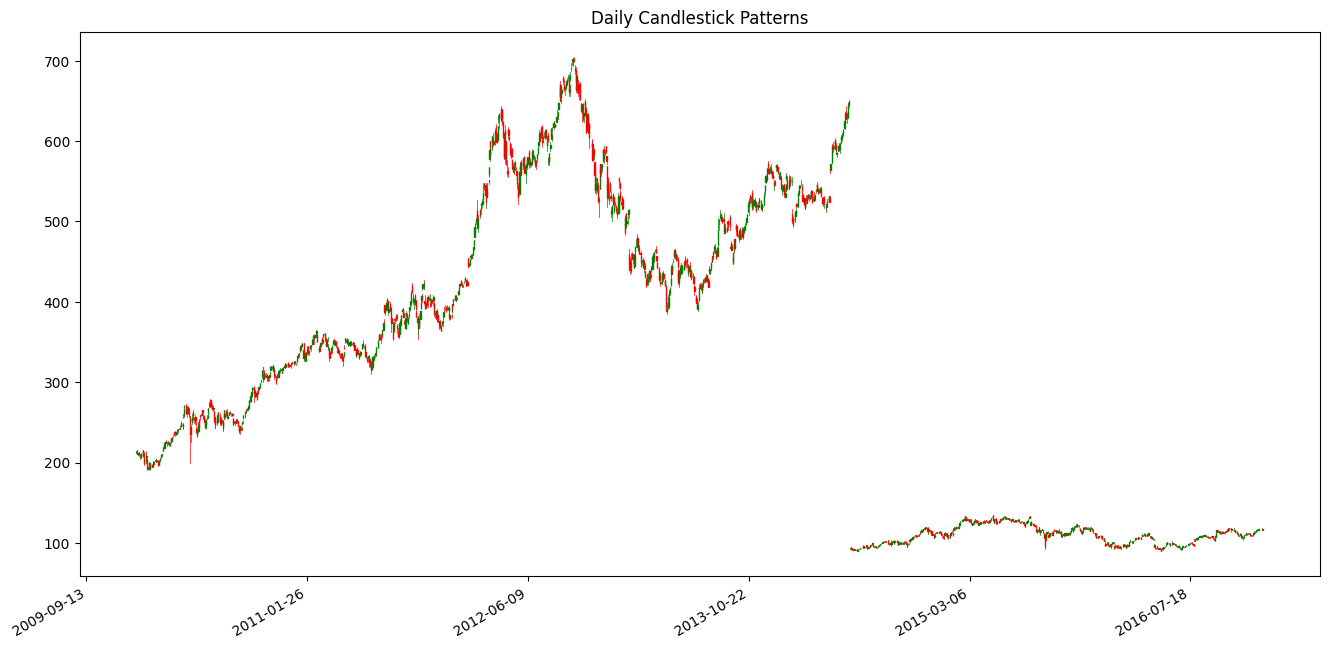

In [14]:
plot_daily_candlestick(stocks_df, "Daily Candlestick Patterns")

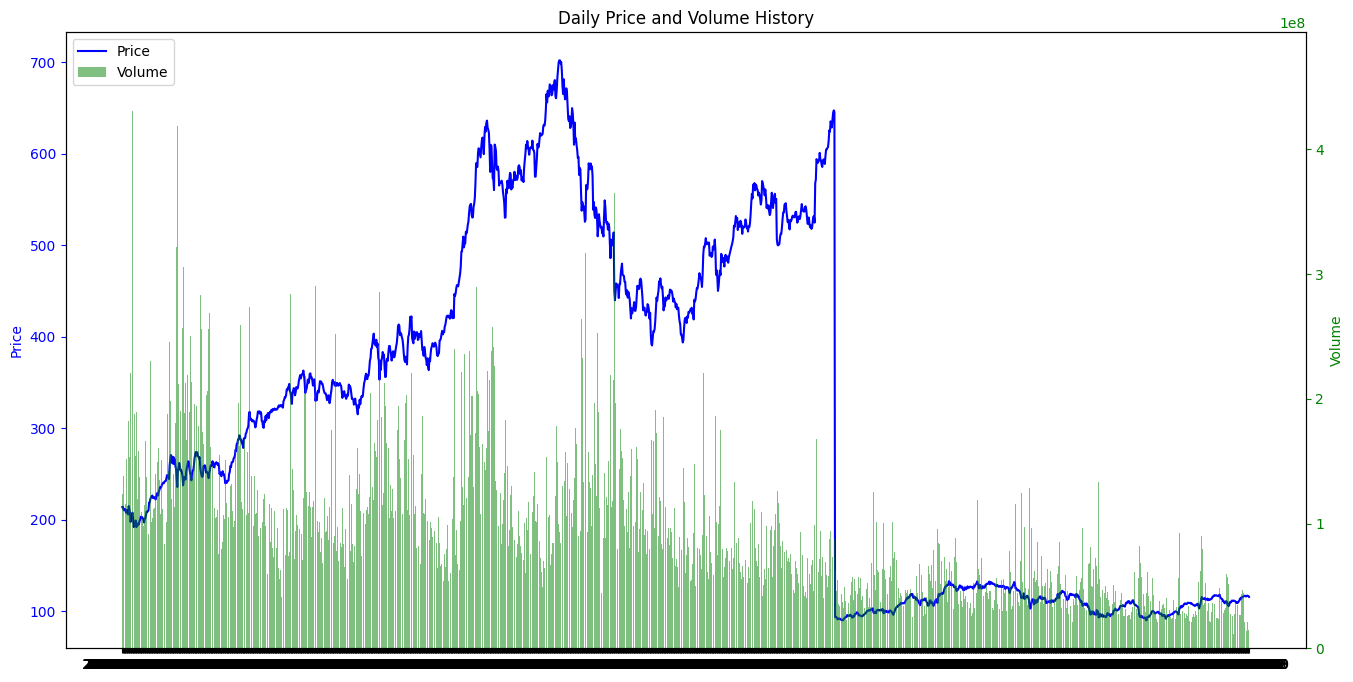

In [15]:
plot_daily_price_and_volume(stocks_df, "Daily Price and Volume History")

In [16]:
from pyspark.sql.functions import col, avg, max, min, mean, stddev

def get_candle_stats(df, time_window):
    """
    Computes statistics for candlestick patterns (Open, High, Low, Close) based on a time window.

    Args:
        df (pyspark.sql.DataFrame): The DataFrame containing stock data.
        time_window (str): The time window to group the data by (e.g., "year", "month", "week").

    Returns:
        pyspark.sql.DataFrame: A DataFrame with candlestick statistics for the specified time window.
    """
    return (
        df.groupBy(time_window)
        .agg(
            avg("open").alias("avg_open"),
            max("high").alias("max_high"),
            min("low").alias("min_low"),
            mean("close").alias("mean_close"),
            stddev("close").alias("std_close"),
        )
        .orderBy(time_window)
    )

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
import numpy as np
from pyspark.sql.functions import col, to_date, unix_timestamp

def plot_candlestick(df, time_window, title):
    """
    Plots candlestick patterns for the specified time window.

    Args:
        df (pyspark.sql.DataFrame): The DataFrame containing stock data.
        time_window (str): The time window to group the data by (e.g., "year", "month", "week").
        title (str): The title of the plot.
    """
    data = df.select(
        unix_timestamp(to_date(col(time_window))).alias("date"),
        "open",
        "high",
        "low",
        "close"
    ).toPandas()
    
    # Convert Unix timestamps to numpy.datetime64
    data["date"] = data["date"].apply(lambda x: np.datetime64(int(x), 's'))
    
    # Convert numpy.datetime64 to Matplotlib's date representation
    dates = mdates.date2num(data["date"])
    
    data = data[["open", "high", "low", "close"]].values.tolist()
    
    # Prepend dates to the data
    data = [[dates[i]] + data[i] for i in range(len(dates))]

    fig, ax = plt.subplots(figsize=(16, 8))
    ax.set_title(title)
    candlestick_ohlc(ax, data, width=0.6, colorup="green", colordown="red")
    
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate()
    plt.show()

def plot_price_history(df, time_window, title):
    """
    Plots the price history for the specified time window.

    Args:
        df (pyspark.sql.DataFrame): The DataFrame containing stock data.
        time_window (str): The time window to group the data by (e.g., "year", "month", "week").
        title (str): The title of the plot.
    """
    data = df.select(to_date(col(time_window)).alias(time_window), "close").toPandas()
    data = data.set_index(time_window)

    fig, ax = plt.subplots(figsize=(16, 8))
    ax.set_title(title)
    ax.plot(data.index, data["close"])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate()
    plt.show()

def plot_volume_history(df, time_window, title):
    """
    Plots the volume history for the specified time window.

    Args:
        df (pyspark.sql.DataFrame): The DataFrame containing stock data.
        time_window (str): The time window to group the data by (e.g., "year", "month", "week").
        title (str): The title of the plot.
    """
    data = df.select(to_date(col(time_window)).alias(time_window), "volume").toPandas()
    data = data.set_index(time_window)

    fig, ax = plt.subplots(figsize=(16, 8))
    ax.set_title(title)
    ax.plot(data.index, data["volume"])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    fig.autofmt_xdate()
    plt.show()

## sampling

***Why using mean for sampling ?***

In the context of stock data, outliers can be very important. These outliers often represent significant events in the market, such as a company’s earnings announcements, macroeconomic news (like changes in interest rates), or even broader market events like geopolitical instability. These events can cause large swings in stock prices, and these swings are often the very data points that traders and investors are most interested in.

Wheweou use the mean (average) for sampling from the stock data, you’re essentially capturing the “typical” behavior of the stock. The mean is calculated by adding up all the values and dividing by the number of values. This method gives equal weight to all data points, including outliers. Therefore, outliers can have a significant impact on the mean, pulling it higher or lower.

By using the meanouryour analyswe you’re ensuring that these significant events (outliers) are included in your sample and are influencing the results of your analysis. This is in contrast to other methods like the median or trimmed mean, which might downplay the impact of outliers.


In [18]:
from pyspark.sql.functions import date_format, year, month, weekofyear

def sample_data(df, sample_type):
    """
    Samples the stock data based on the specified sample type (Weekly, Monthly, Yearly).

    Args:
        df (pyspark.sql.DataFrame): The DataFrame containing stock data.
        sample_type (str): The sample type ("Weekly", "Monthly", or "Yearly").

    Returns:
        pyspark.sql.DataFrame: A DataFrame with the sampled data.
    """
    if sample_type == "Weekly":
        return df.withColumn("week", weekofyear(col("date"))).dropDuplicates(["week"])
    elif sample_type == "Monthly":
        return df.withColumn("month_year", date_format(col("date"), "yyyy-MM")).dropDuplicates(["month_year"])
    elif sample_type == "Yearly":
        return df.withColumn("year", year(col("date"))).dropDuplicates(["year"])
    else:
        raise ValueError("Invalid sample type. Use 'Weekly', 'Monthly', or 'Yearly'.")

## Perform eda on sampled data

In [19]:
sampled_weekly = sample_data(stocks_df, "Weekly")
sampled_monthly = sample_data(stocks_df, "Monthly")
sampled_yearly = sample_data(stocks_df, "Yearly")

In [20]:
from pyspark.sql.functions import date_format, year, month, weekofyear

def perform_eda(df, time_window, sample_type, show_stats=True):
    """
    Performs Exploratory Data Analysis (EDA) on the stock data for a given time window.

    Args:
        df (pyspark.sql.DataFrame): The DataFrame containing stock data.
        time_window (str): The time window column (e.g., "date", "month_year", "year").
        sample_type (str): The sample type ("Weekly", "Monthly", or "Yearly").
        show_stats (bool): Whether to display the candlestick statistics or not.

    Returns:
        None
    """
    sampled_df = sample_data(df, sample_type)
    
    plot_candlestick(sampled_df, time_window, f"{sample_type} Candlestick Patterns")
    
    if show_stats:
        stats_df = get_candle_stats(sampled_df, time_window)
        show_data(stats_df)


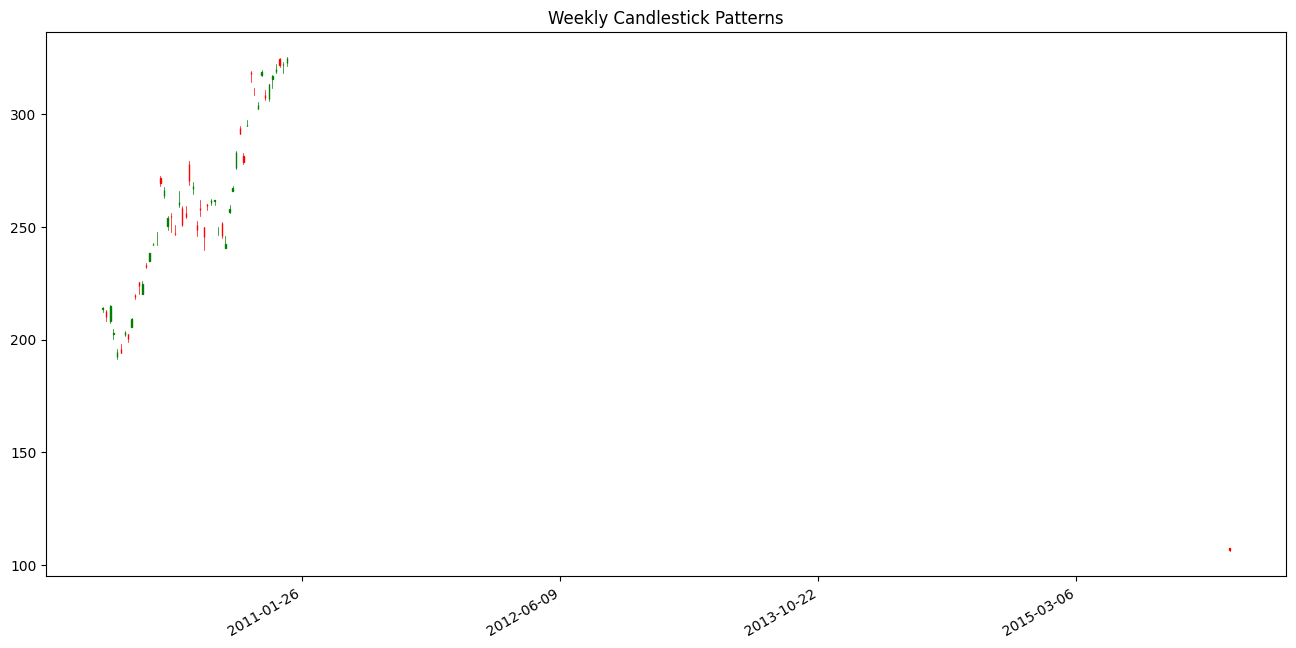

Number of rows: 53
First few rows:
+----------+------------------+---------+---------+------------------+---------+
|      date|          avg_open| max_high|  min_low|        mean_close|std_close|
+----------+------------------+---------+---------+------------------+---------+
|2010-01-04|213.42999267578125|    214.5|   212.38|214.00999450683594|     NULL|
|2010-01-11| 212.8000030517578|    213.0|208.45001|210.11000061035156|     NULL|
|2010-01-19| 208.3300018310547|   215.19|   207.24| 215.0399932861328|     NULL|
|2010-01-25|202.50999450683594|    204.7|   200.19|203.07000732421875|     NULL|
|2010-02-01| 192.3699951171875|    196.0|    191.3|194.72999572753906|     NULL|
|2010-02-08|195.69000244140625|   197.88|    194.0| 194.1199951171875|     NULL|
|2010-02-16|201.94000244140625|   203.69|   201.52|203.39999389648438|     NULL|
|2010-02-22|202.33999633789062|    202.5|   199.19| 200.4199981689453|     NULL|
|2010-03-01|            205.75|    209.5|   205.45|208.99000549316406|    

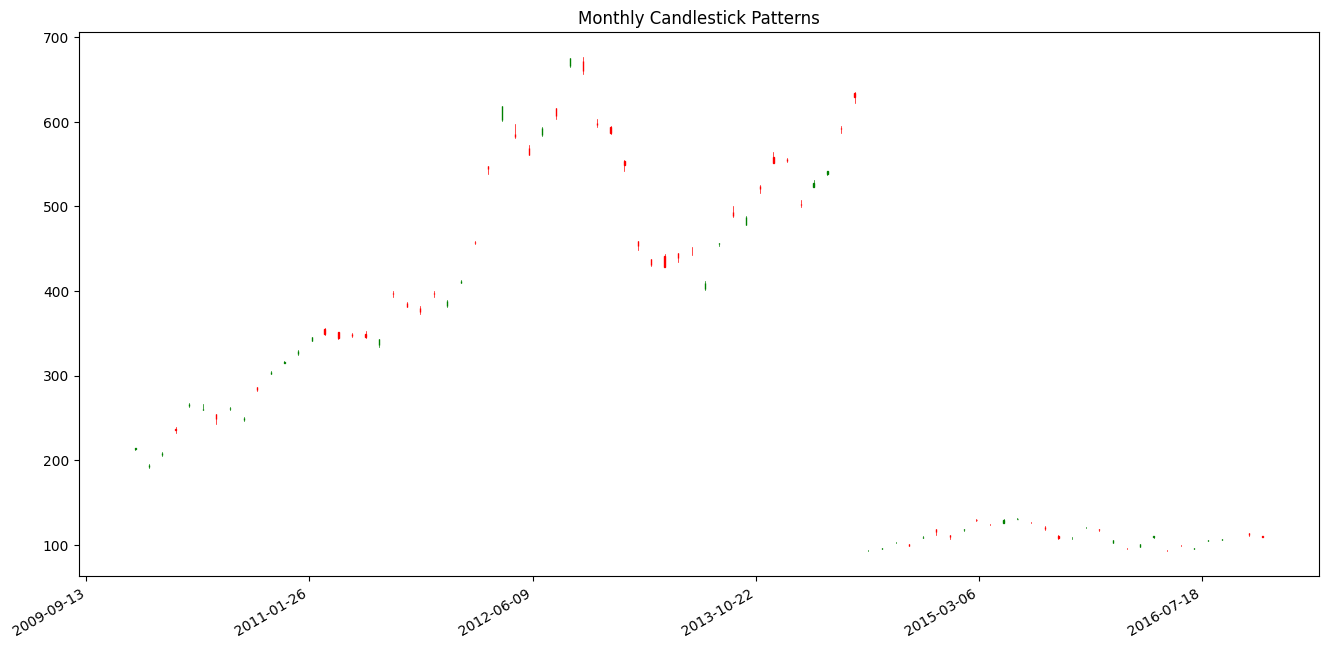

Number of rows: 84
First few rows:
+----------+------------------+---------+---------+------------------+---------+
|month_year|          avg_open| max_high|  min_low|        mean_close|std_close|
+----------+------------------+---------+---------+------------------+---------+
|   2010-01|213.42999267578125|    214.5|   212.38|214.00999450683594|     NULL|
|   2010-02| 192.3699951171875|    196.0|    191.3|194.72999572753906|     NULL|
|   2010-03|            205.75|    209.5|   205.45|208.99000549316406|     NULL|
|   2010-04|237.41000366210938|   238.73|   232.75|235.97000122070312|     NULL|
|   2010-05| 263.8399963378906|   267.88|   262.88| 266.3500061035156|     NULL|
|   2010-06|259.69000244140625|   265.94|   258.96|260.83001708984375|     NULL|
|   2010-07| 254.3000030517578|254.80002|243.22002|248.47999572753906|     NULL|
|   2010-08|260.44000244140625|   262.59|   259.62| 261.8500061035156|     NULL|
|   2010-09|247.46998596191406|251.45999|   246.28| 250.3300018310547|    

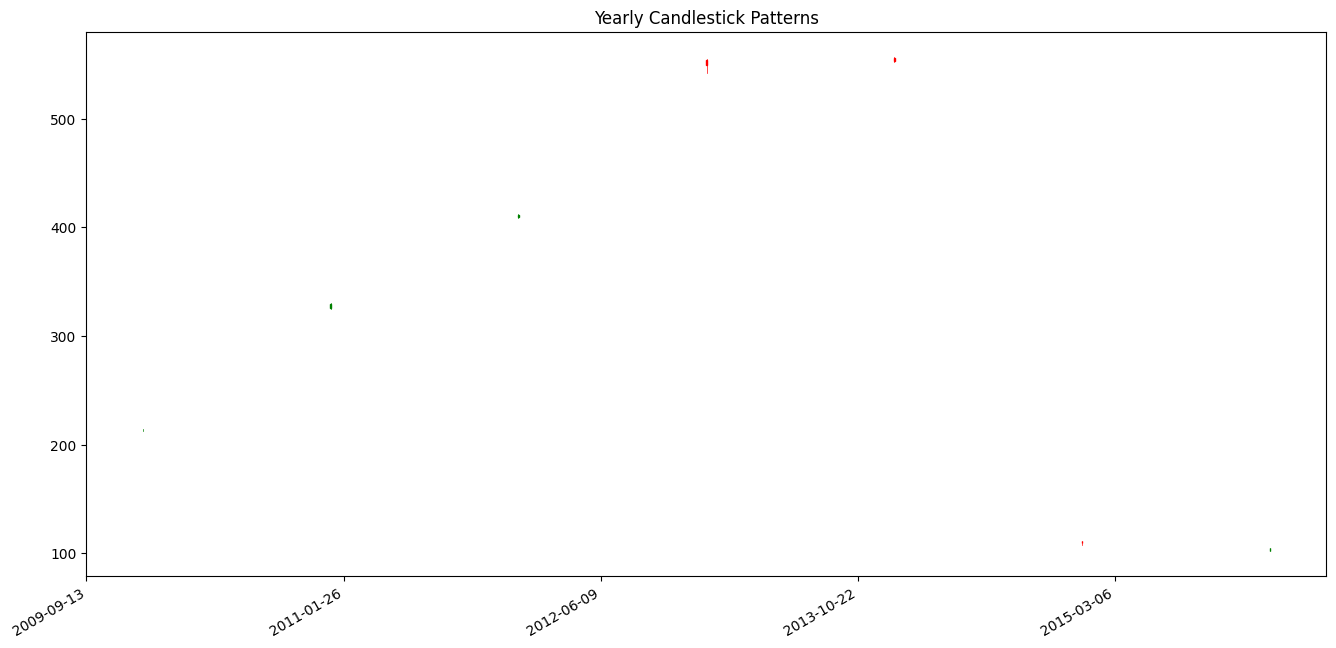

In [21]:
perform_eda(stocks_df, "date", "Weekly")
perform_eda(stocks_df, "month_year", "Monthly")
perform_eda(stocks_df, "year", "Yearly", show_stats=False)